# What is a PDF?
#### by Elizabeth Barnes
This example shows the making of a probability density function.

In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import importlib

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

We begin by defining two Gaussian random variables: x has length 50 and y has length 1000.

In [16]:
xinc = 0.5

x = np.random.normal(0,1,size = (50,))
y = np.random.normal(0,1,size = (1000,))

Next, we plot the values.

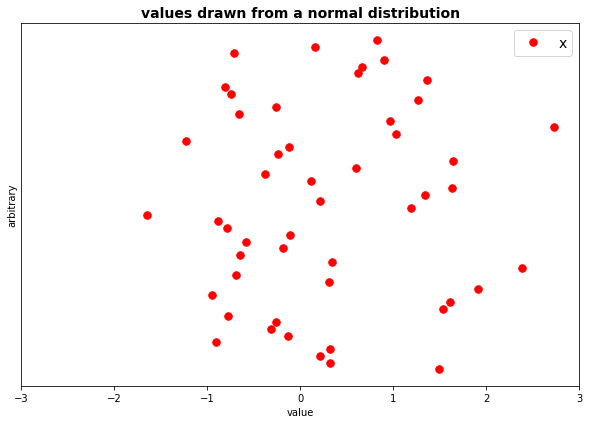

In [17]:
fig, ax = cgf.cfig(1)
plt.xlabel('value')
plt.ylabel('arbitrary')
plt.yticks([])
plt.title('values drawn from a normal distribution')
plt.xlim(-3,3)

ax.plot(x,np.arange(0,np.size(x)),'.r', markersize = 15, label = 'x')
ax.legend()
fig

Now let's add the 1000 y-values to this scatter mess.

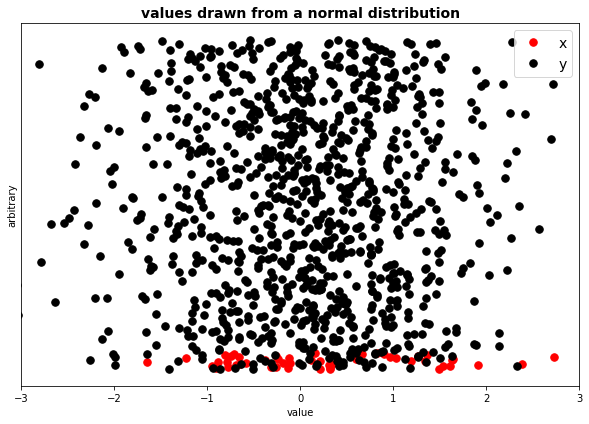

In [18]:
ax.plot(y,np.arange(0,np.size(y)),'.k', markersize = 15, label = 'y')
ax.legend()
fig

### Making a histogram
While plotting the data in its raw form is incredibly important and useful, sometimes it is difficult to visualize. For example, how many black dots are hiding underneath other black dots? To deal with this, we can display our data in a histogram - that is, discretize our data into bins. Let's add some bins.

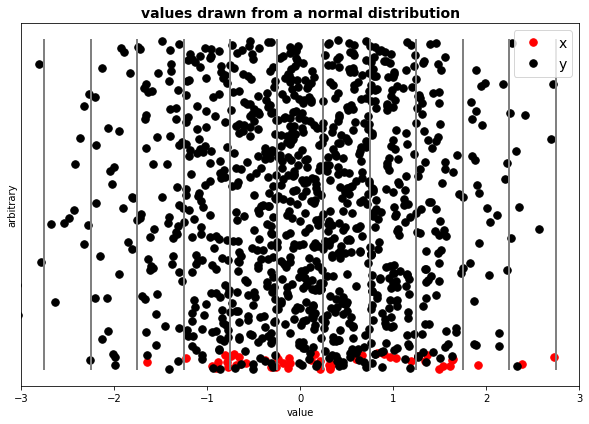

In [19]:
xbins = np.arange(-4, 4.5, xinc)
for ind, val in enumerate(xbins[1:]):
    ax.plot([val - 0.25, val-0.25], [0, np.size(y)],'-', color = 'gray')
fig

Now, we count how many values fall within each bin and plot this count on the y-axis.

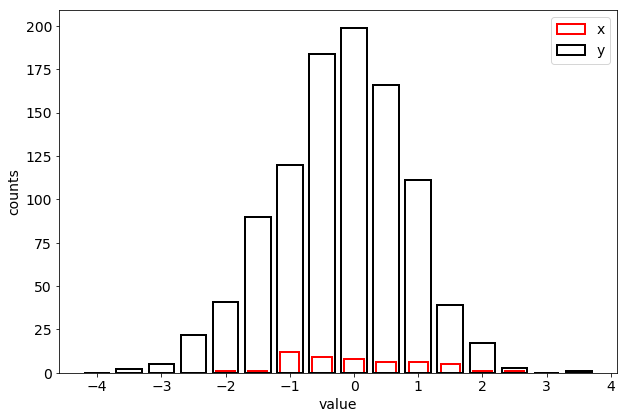

In [20]:
fig, ax = cgf.cfig(2)

hx = np.histogram(x,xbins)
hy = np.histogram(y,xbins)

plt.xlabel('value')
plt.ylabel('counts')

plt.bar(hx[1][:-1],hx[0],edgecolor = 'r', color = [], width = .3, label = 'x', linewidth = 2)
plt.bar(hy[1][:-1],hy[0],edgecolor = 'k', color = [], width = .4, label = 'y', linewidth = 2)
plt.legend()
fig

### Normalizing the counts
Our histogram looks great, and we can see that y takes on a Guassian shape, but what about x? It is really hard to see because the counts are so small. This may be what you want to show. However, if the goal is to compare the distributions, then this scaling is not very useful.

Instead, we can turn the counts into units of frequency.

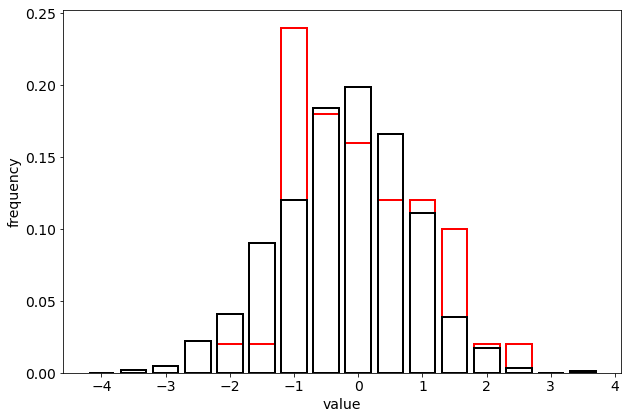

In [21]:
fig, ax = cgf.cfig(3)
plt.xlabel('value')
plt.ylabel('frequency')

plt.bar(hx[1][:-1],hx[0].astype(float)/np.size(x),edgecolor = 'r', color = [], width = .4, linewidth = 2)
plt.bar(hy[1][:-1],hy[0].astype(float)/np.size(y),edgecolor = 'k', color = [], width = .4, linewidth = 2)
fig

Now that the x and y data are on the same footing (normalized to frequency) we can more easily compare the distributions and see that in fact they are both quite similar to one another (although x is less Gaussian-like due to its lower sample size).

### Making this a true probability density function (PDF)
A true PDF is continuous, while histograms are certainly discrete. To deal with this, we can plot as a line curve.

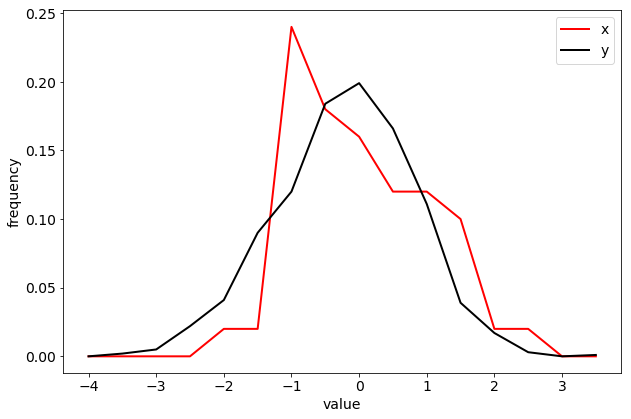

In [22]:
fig, ax = cgf.cfig(5)

xvals = hx[1][:-1]
fvalsx = hx[0].astype(float)/np.size(x)
fvalsy = hy[0].astype(float)/np.size(y)

plt.plot(xvals,fvalsx,'r', label = 'x')
plt.plot(xvals,fvalsy,'k', label = 'y')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()

fig

However, PDFs have the requirement that the area under the curve (i.e. the total probability) must sum to 1.0. Note that this does not mean the y-vals need to sum to 1.0, but rather, the integral under the curve (which includes the width of the x-axis bins) must sum to 1.0.

In [23]:
[np.sum(fvalsx), np.sum(fvalsy)]

[1.0, 1.0]

In [24]:
[np.sum(fvalsx*xinc), np.sum(fvalsy*xinc)]

[0.5, 0.5]

As you can see, the integral does not sum to 1.0, but rather, to 0.5 for both variables. Thus, our actual PDF plot should be scaled by the bin width this (in which case, it becomes independent of our choice of x-axis bin width).

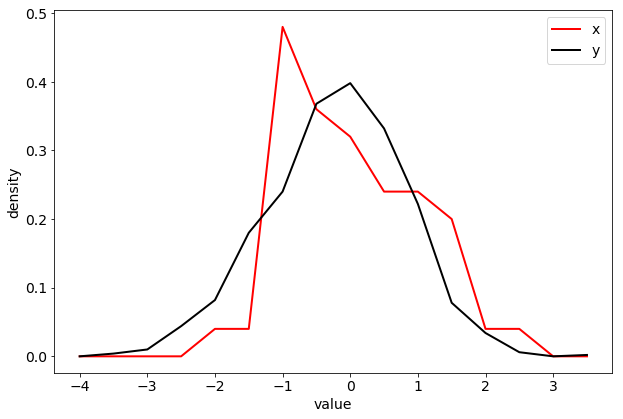

In [25]:
fig, ax = cgf.cfig(5)

xvals = hx[1][:-1]
fvalsx = hx[0].astype(float)/(np.size(x)*xinc)
fvalsy = hy[0].astype(float)/(np.size(y)*xinc)

plt.plot(xvals,fvalsx,'r', label = 'x')
plt.plot(xvals,fvalsy,'k', label = 'y')
plt.xlabel('value')
plt.ylabel('density')
plt.legend()

fig

In [26]:
[np.sum(fvalsx)*xinc, np.sum(fvalsy)*xinc]

[1.0, 1.0]

### The cumulative density function (CDF)
The cumulative density function (CDF) is a close partner of the PDF, but instead shows the probability that the data will take a value less than or equal to x.

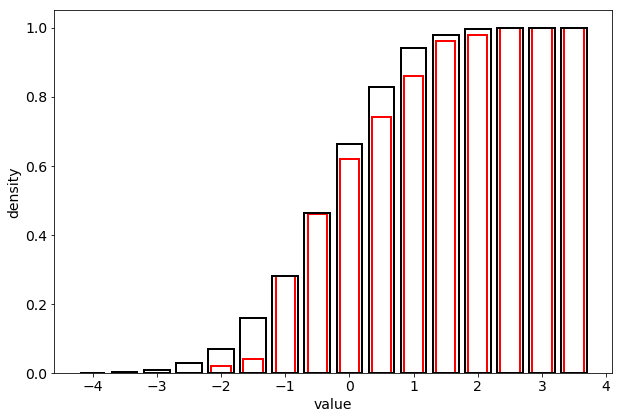

In [30]:
fig, ax = cgf.cfig(8)

hxx = np.cumsum(hx[0])
hyy = np.cumsum(hy[0])

plt.xlabel('value')
plt.ylabel('density')

plt.bar(hx[1][:-1],hxx.astype(float)/np.size(x),edgecolor = 'r', color = [], width = .3, linewidth = 2)
plt.bar(hy[1][:-1],hyy.astype(float)/np.size(y),edgecolor = 'k', color = [], width = .4, linewidth = 2)
fig